# Numerical Computing in Python

(C) 2016 [Steve Phelps](http://sphelps.net)



# Overview

- Pseudo-random variates with `numpy.random`

# Importing numpy


- Functions for numerical computiing are provided by a separate _module_ called [`numpy`](http://www.numpy.org/).  

- Before we use the numpy module we must import it.

- By convention, we import `numpy` using the alias `np`.

- Once we have done this we can prefix the functions in the numpy library using the prefix `np.`

In [1]:
import numpy as np

- We can now use the functions defined in this package by prefixing them with `np`.  


# Generating (pseudo) random numbers

- The nested module `numpy.random` contains functions for generating random numbers from different probability distributions.


In [2]:
from numpy.random import normal, uniform, exponential, randint

- Suppose that we have a random variable $\epsilon \sim N(0, 1)$.

- In Python we can draw from this distribution like so:

In [3]:
epsilon = normal()
print(epsilon)

0.0035539365628716297


- If we execute another call to the function, we will make a _new_ draw from the distribution:

In [4]:
epsilon = normal()
print(epsilon)

-1.1015201985917449


# Pseudo-random numbers

- Strictly speaking, these are not random numbers.

- They rely on an initial state value called the *seed*.

- If we know the seed, then we can predict with total accuracy the rest of the sequence, given any "random" number.

- Nevertheless, statistically they behave like independently and identically-distributed values.
    - Statistical tests for correlation and auto-correlation give insignificant results.

- For this reason they called *pseudo*-random numbers.

- The algorithms for generating them are called Pseudo-Random Number Generators (PRNGs).

- Some applications, such as cryptography, require genuinely unpredictable sequences.
    - never use a standard PRNG for these applications!

# Managing seed values

- In some applications we need to reliably reproduce the same sequence of pseudo-random numbers that were used.

- We can specify the seed value at the beginning of execution to achieve this.

- Use the function `seed()` in the `numpy.random` module.



# Setting the seed

In [5]:
from numpy.random import seed

seed(5)


In [6]:
normal()

0.44122748688504143

In [7]:
normal()

-0.33087015189408764

In [8]:
seed(5)

In [9]:
normal()

0.44122748688504143

In [10]:
normal()

-0.33087015189408764

# Drawing multiple variates

- To generate more than number, we can specify the `size` parameter:

In [11]:
normal(size=10)

array([ 2.43077119, -0.25209213,  0.10960984,  1.58248112, -0.9092324 ,
       -0.59163666,  0.18760323, -0.32986996, -1.19276461, -0.20487651])

- If you are generating very many variates, this will be *much* faster than using a for loop

- We can also specify more than one dimension:


In [12]:
normal(size=(5,5))

array([[-0.35882895,  0.6034716 , -1.66478853, -0.70017904,  1.15139101],
       [ 1.85733101, -1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127,  0.05914424],
       [-0.36331088,  0.00328884, -0.10593044,  0.79305332, -0.63157163],
       [-0.00619491, -0.10106761, -0.05230815,  0.24921766,  0.19766009]])

# Histograms

- We can plot a histograms of randomly-distributed data using the `hist()` function from matplotlib:

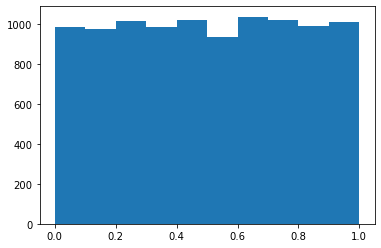

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

data = uniform(size=10000)
ax = plt.hist(data)

# Computing histograms as matrices

- The function `histogram()` in the `numpy` module will count frequencies into bins and return the result as a 2-dimensional array.

In [14]:
import numpy as np
np.histogram(data)

(array([ 988,  976, 1020,  989, 1023,  937, 1039, 1024,  990, 1014],
       dtype=int64),
 array([1.46809660e-04, 1.00130044e-01, 2.00113277e-01, 3.00096511e-01,
        4.00079745e-01, 5.00062979e-01, 6.00046213e-01, 7.00029447e-01,
        8.00012681e-01, 8.99995915e-01, 9.99979148e-01]))

# Summary statistics

- We can compute the summary statistics of a sample of values using the numpy functions `mean()` and `var()` to compute the sample mean $\bar{X}$ and sample [variance](https://en.wikipedia.org/wiki/Variance) $\sigma_{X}^2$ .


In [15]:
np.mean(data)

0.5023220095687821

In [16]:
np.var(data)

0.08300292235792911

- These functions also have an `axis` parameter to compute mean and variances of columns or rows of a multi-dimensional data-set.

# Summary statistics with `nan` values

- If the data contains `nan` values, then the summary statistics will also be `nan`.



In [17]:
from numpy import nan
import numpy as np
data = np.array([1, 2, 3, 4, nan])
np.mean(data)

nan

- To omit `nan` values from the calculation, use the functions `nanmean()` and `nanvar()`:

In [18]:
np.nanmean(data)

2.5

# Discrete random numbers

- The `randint()` function in `numpy.random` can be used to draw from a uniform discrete probability distribution.

- It takes two parameters: the low value (inclusive), and the high value (exclusive).

- So to simulate one roll of a die, we would use the following Python code.


In [19]:
die_roll = randint(0, 6) + 1
die_roll

5

- Just as with the `normal()` function, we can generate an entire sequence of values.

- To simulate a [Bernoulli process](https://en.wikipedia.org/wiki/Bernoulli_process) with $n=20$ trials:

In [20]:
bernoulli_trials = randint(0, 2, size = 20)
bernoulli_trials

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

### Acknowledgements

The earlier sections of this notebook were adapted from [an article on floating-point numbers](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) written by [Steve Hollasch](http://steve.hollasch.net/).